In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg
from math import sqrt

Linear regression on two points. Exact fit

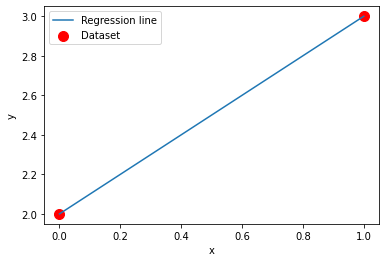

In [2]:

x_data = np.array([[0], [1]])
y_data = np.array([[2], [3]])

X = np.hstack((x_data**0, x_data**1))
a_solve = linalg.solve(X, y_data)

x = np.linspace(0, 1, 10)
y = a_solve[0] + a_solve[1]*x

plt.scatter(x_data,y_data, label='Dataset', s=100, c='r')
plt.plot(x, y, label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Linear regression on three points. \\
Least squares approximation. \\
Compose the normal equation by hand and solve it using linalg.solve

X:
 [[ 1  0]
 [ 1  1]
 [ 1 -1]] 
XT:
 [[ 1  1  1]
 [ 0  1 -1]]
XT @ X:
 [[3 0]
 [0 2]] 
XT @ y:
 [[3]
 [5]]
coefficients:
 [[1. ]
 [2.5]]


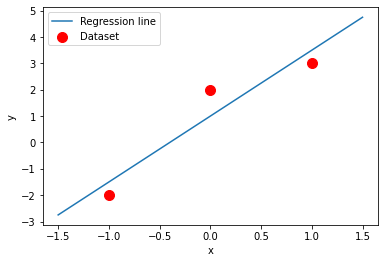

In [3]:

x_data = np.array([[0], [1], [-1]])
y_data = np.array([[2], [3], [-2]])

X = np.hstack((x_data**0, x_data**1))
XT = X.T
print('X:\n', X, '\nXT:\n', XT)
XTX = XT @ X
XTy = XT @ y_data
print('XT @ X:\n', XTX, '\nXT @ y:\n', XTy)

a_solve = linalg.solve(XTX, XTy)
print('coefficients:\n', a_solve)

x = np.linspace(-1.5, 1.5, 10)
y = a_solve[0] + a_solve[1] * x

plt.scatter(x_data,y_data, label='Dataset', s=100, c='r')
plt.plot(x, y, label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

All the data returned by numpy.linalg.lstsq

In [4]:
a, resid, rank, singvals = np.linalg.lstsq(X, y_data, rcond=None)
print('regression coefficients a:\n', a) # Least-squares solution
print('resid:\n', resid) # Sums of squared residuals
print('rank X:\n', rank) # Rank of matrix X
print('singular values of X:\n', singvals) # Singular values of

regression coefficients a:
 [[1. ]
 [2.5]]
resid:
 [1.5]
rank X:
 2
singular values of X:
 [1.73205081 1.41421356]


In [5]:
# regression coefficients returned by numpy.linalg.lstsq
a = np.linalg.lstsq(X, y_data, rcond=None)[0]
a

array([[1. ],
       [2.5]])

In [6]:
# sum of squared residuals returned by numpy.linalg.lstsq
np.linalg.lstsq(X, y_data, rcond=None)[1]

array([1.5])

# Tikhonov regularization: 
Regression on two datasets with the same design matrix X and close values of target variable y

Having two sets of close data

<table>
  <tr>
    <th></th>
    <th>xi</th>
    <th>yi</th>
  </tr>
  <tr>
    <td>i=0</td>
    <td>1.0</td>
    <td>3.001</td>
  </tr>
  <tr>
    <td>i=1</td>
    <td>1.001</td>
    <td>2.999</td>
  </tr>
</table> 
and
<table>
  <tr>
    <th></th>
    <th>xi</th>
    <th>yi</th>
  </tr>
  <tr>
    <td>i=0</td>
    <td>1.0</td>
    <td>2.999</td>
  </tr>
  <tr>
    <td>i=1</td>
    <td>1.001</td>
    <td>3.001</td>
  </tr>
</table>

we are approximating them by a straight line
$$y=a_0+a_1x$$

1) by solving the system of linear equations:
$$X\overrightarrow{a}=\overrightarrow{y}, X=\left(\begin{matrix} 1.0& 1.0 \\ 1.0 & 1.001 \end{matrix}\right), \overrightarrow{y}=\left(\begin{matrix}1.001\\ 0.999 \end{matrix}\right) or \left(\begin{matrix}0.999\\ 1.001 \end{matrix}\right);$$

2) using Tikhonov (aka ridge) regularization.


Coefficients for
 the first dataset:
 [[ 5.001]
 [-2.   ]] 
 the second dataset:
 [[0.999]
 [2.   ]]


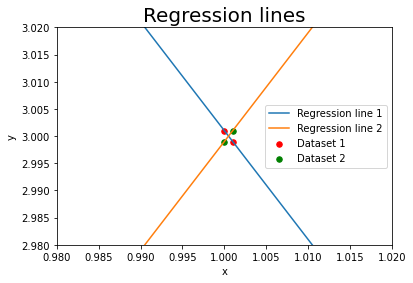

In [7]:
# Linear regression on close data
# Produсes 2 very different lines
x_data = np.array([[1.0], [1.001]])
y_data1 = np.array([[3.001], [2.999]])
y_data2 = np.array([[2.999], [3.001]])

X = np.hstack((x_data**0, x_data**1))
a_solve1 = linalg.solve(X, y_data1)
a_solve2 = linalg.solve(X, y_data2)
print('Coefficients for\n the first dataset:\n', a_solve1, '\n the second dataset:\n', a_solve2)

x = np.linspace(-1.5, 1.5, 10) # will be the same throughout this example
y1 = a_solve1[0] + a_solve1[1] * x
y2 = a_solve2[0] + a_solve2[1] * x

plt.xlim(xmin=0.98, xmax=1.02)
plt.ylim(ymin=2.98, ymax=3.02)
plt.scatter(x_data,y_data1, label='Dataset 1', s=30, c='r')
plt.scatter(x_data,y_data2, label='Dataset 2', s=30, c='g')
plt.plot(x, y1, label='Regression line 1')
plt.plot(x, y2, label='Regression line 2')
plt.title('Regression lines', fontsize=20)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

The same but computed using least squares. No picture, but we made sure, the coefficients are the same. 

In [8]:
print(linalg.lstsq(X, y_data1)[0])
print(linalg.lstsq(X, y_data2)[0])

[[ 5.001]
 [-2.   ]]
[[0.999]
 [2.   ]]


Tikhonov regularization close data by hand \\
 Produces almost the same line for both datasets. 

[[2.1      2.001   ]
 [2.001    2.102001]]
41.019905002755735
[[6.      ]
 [6.002999]]
[[6.      ]
 [6.003001]]
[[1.46270939]
 [1.46342343]]
[[1.46269963]
 [1.46343367]]


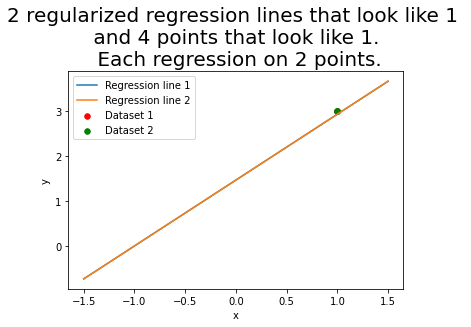

In [9]:
# constructing normal equation with Tikhonov regularizer
XT = X.T
# RHS
XTy1 = XT @ y_data1
XTy2 = XT @ y_data2
reg_param = 0.1
# LHS, same for both regressions
X_ridge = X.T @ X + reg_param * np.identity(2) 
print(X_ridge)
print(np.linalg.cond(X_ridge))
print(XTy1)
print(XTy2)
# solving Tikhonov system
a_ridge1 = linalg.solve(X_ridge, XTy1)
a_ridge2 = linalg.solve(X_ridge, XTy2)

print(a_ridge1)
print(a_ridge2)

y1 = a_ridge1[0] + a_ridge1[1] * x
y2 = a_ridge2[0] + a_ridge2[1] * x

x = np.linspace(-1.5, 1.5, 10)
# plt.xlim(xmin=0.98, xmax=1.02)
# plt.ylim(ymin=2.98, ymax=3.02)
plt.scatter(x_data,y_data1, label='Dataset 1', s=30, c='r')
plt.scatter(x_data,y_data2, label='Dataset 2', s=30, c='g')
plt.plot(x, y1, label='Regression line 1')
plt.plot(x, y2, label='Regression line 2')
plt.title('2 regularized regression lines that look like 1 \n and 4 points that look like 1. \n Each regression on 2 points.', fontsize=20)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
# So if both systems are done with regularization, 
# their coefficients are similar. 

Tikhonov regularization using Ridge from sklearn.linear_model

k=  [[-9.99995e-06]
 [ 9.99995e-06]] b=  [3.00001 2.99999]
For the first dataset: slope k =  -9.999950000247797e-06 , intercept b =  3.000010004949975 
For the first dataset: slope k =  9.999950000247797e-06 , intercept b =  2.999989995050025


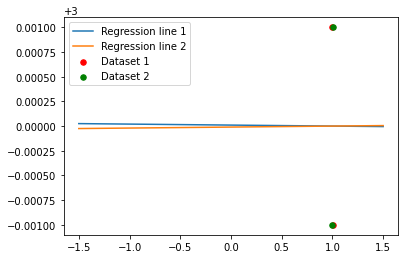

In [10]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1)

x = x.reshape(-1, 1)

# we'll be fitting the regression lines to the both right-hand parts simultaneously
y_data = np.hstack((y_data1, y_data2))# Both RHS
ridge.fit(x_data, y_data)
k = ridge.coef_
b = ridge.intercept_
print('k= ', k, 'b= ', b)
print('For the first dataset: slope k = ', k[0][0], ', intercept b = ', b[0],
      '\nFor the first dataset: slope k = ', k[1][0], ', intercept b = ', b[1])
# predict y using the linear resgression models fitted in the previous lines of code
# will produce a two-column array, each column corresponding to the linear regression model 
# fitted for RHS y_data1 or y_data2 respectively
y = ridge.predict(x)

# plt.xlim(xmin=0.98, xmax=1.02)
# plt.ylim(ymin=2.98, ymax=3.02)
plt.scatter(x_data,y_data1, label='Dataset 1', s=30, c='r')
plt.scatter(x_data,y_data[:,1], label='Dataset 2', s=30, c='g')
plt.plot(x, y[:,0], label='Regression line 1')
plt.plot(x, y[:,1], label='Regression line 2')
plt.legend()
plt.show()

We see that the regression lines obtained using sklearn differ from those we drew when constructing Tikhonov system by hand. The reason is that when we append a column of 1s to our x_data (i.e. when we construct the matrix `X = np.hstack((x_data**0, x_data**1))` for our Tikhonov system)  we also add L2 penalty onto the intercept term. Scikit-learn ridge regression does not do it. It gives the intercept which perfectly reconstructs the mean of all the points (because the slope is almost zero). Here the intercept was not part of the regularization. It is around 3 in both cases. 

This is the equation Ridge actually solves. We try to reconcile these two cases, making a hole in the identity matrix. 

In [11]:

X_nointerceptpenalty = X.T @ X + reg_param * np.array([[0, 0], [0, 1]])
print('Tikhonov matrix without penalty on intercept:\n', X_nointerceptpenalty)
print('\nFor the first dataset:\n', linalg.solve(X_nointerceptpenalty, XTy1))
print('\nFor the first dataset:\n', linalg.solve(X_nointerceptpenalty, XTy2))

Tikhonov matrix without penalty on intercept:
 [[2.       2.001   ]
 [2.001    2.102001]]

For the first dataset:
 [[ 3.00001e+00]
 [-9.99995e-06]]

For the first dataset:
 [[2.99999e+00]
 [9.99995e-06]]


If you want to have L2 penalty on the intercept, then simply call Ridge on X (and turn off fitting intercept in the constructor) as shown in the code below.

For the first dataset: slope k =  1.463423428167315 , intercept b =  1.4627093905891435
For the second dataset: slope k =  1.463433667047705 , intercept b =  1.462699634398829


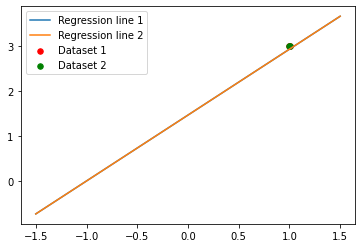

In [12]:
ridge = Ridge(alpha=0.1, fit_intercept = False) # regression without fitting intercept

X = np.hstack((x_data ** 0, x_data ** 1))

# below we fit regression separately for each RHS y_data1 and y_data2, 
# but we could do it simulaneously introducing y_data = np.hstack((y_data1, y_data2))

ridge.fit(X, y_data1)
k1 = ridge.coef_
print('For the first dataset: slope k = ', k1[0][1], ', intercept b = ', k1[0][0])
# we determine the predicted values of y by writing down the equation of the line with the coefficients given by calling Ridge
# but we could use y1 = ridge.predict(x) as well
y1 = k1[0][0] + k1[0][1] * x

ridge.fit(X, y_data2)
k2 = ridge.coef_
print('For the second dataset: slope k = ', k2[0][1], ', intercept b = ', k2[0][0])
y2 = k2[0][0] + k2[0][1] * x

# plt.xlim(xmin=0.98, xmax=1.02)
# plt.ylim(ymin=2.98, ymax=3.02)
plt.scatter(x_data,y_data1, label='Dataset 1', s=30, c='r')
plt.scatter(x_data,y_data2, label='Dataset 2', s=30, c='g')
plt.plot(x, y1, label='Regression line 1')
plt.plot(x, y2, label='Regression line 2')
plt.legend()
plt.show()

In [13]:
0# Condition number of X without regularization 
np.linalg.cond(X)

4002.000750125414

# Thikhonov regularization: solving system of equation with ill-conditioned coefficient matrix 

If above we considered two datasets with the same  ill conditioned design matrix and different RHS vectors, now we perturb the elements of ill conditioned design matrix, while keeping the fixed RHS vector.  

In the following code we solve the system of linear equations:
$$ Ax =b $$ 
for the matrices 
$$ A=\left(\begin{matrix} 1&1\\ 1& 1+\varepsilon \end{matrix} \right), b=\left( \begin{matrix}1 \\ 2 \end{matrix}\right), $$
where we choose $\varepsilon$ small, thus making $A$ near degenerate.

The result is that the exact solutions for different choises of $\varepsilon$ vary greatly, whereas the solutions to the Tikhonov-regularized equation
$$ A^TAx+\alpha I_{2\times 2}=A^Tb$$
computed for different coices of $\varepsilon$ are close to each other and the distance between them vanishes as the regularization parametra $\alpha$ increases. 


eps = 0.001
A =  [[1.    1.   ]
 [1.    1.001]] 
b = [[1.]
 [2.]]
x_exact =  [[-999.]
 [1000.]]
x least squares =  [[-999.]
 [1000.]]
alpha =0.1 
x_reg = [[0.72891321]
 [0.73427399]]
alpha =0.5 
x_reg = [[0.66592626]
 [0.66725855]]
alpha =1 
x_reg = [[0.59956014]
 [0.60035962]]
alpha =1.5 
x_reg = [[0.54513506]
 [0.54574078]]
alpha =2 
x_reg = [[0.49975004]
 [0.50024979]]

eps = 0.01
A =  [[1.   1.  ]
 [1.   1.01]] 
b = [[1.]
 [2.]]
x_exact =  [[-99.]
 [100.]]
x least squares =  [[-99.]
 [100.]]
alpha =0.1 
x_reg = [[0.70393827]
 [0.75707942]]
alpha =0.5 
x_reg = [[0.65929252]
 [0.67252174]]
alpha =1 
x_reg = [[0.59561372]
 [0.60356161]]
alpha =1.5 
x_reg = [[0.54226624]
 [0.54829262]]
alpha =2 
x_reg = [[0.49750422]
 [0.50247917]]


array([[-99.],
       [100.]])

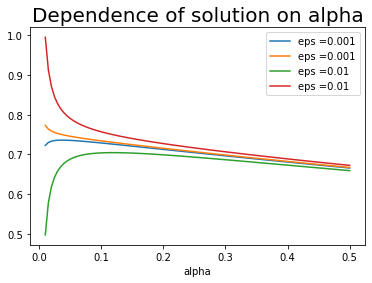

In [14]:
from termcolor import colored

# A is a systemic part of a design matrix.
# It gets modified by eps. 
def solve_eq(A, b, eps) : 
  print(colored('\neps = '+str(eps), 'red', attrs=['bold'])) 
  A = A.astype(float)
  b = b.astype(float)
  n = np.shape(A)[0] 
  # A[n-1][n-1] += eps 
  A[-1][-1] += eps 
  
  # b[n-1][0] += 3 * eps 
  print('A = ', A, '\nb =', b)

  # computing exact solution
  x_exact = linalg.solve(A, b) 
  print('x_exact = ', x_exact)

  x_ls = np.linalg.lstsq(A, b, rcond=None)[0] 
  print('x least squares = ', x_ls)

# topped here
  # Tikhonov regularization for selected regularization parameters
  AT = A.T 
  b_reg = AT @ b 
  for alpha in [0.1, 0.5, 1, 1.5, 2] : 
    A_reg = AT @ A + alpha * np.identity(n) 
    x_reg = linalg.solve(A_reg, b_reg) 
    print(colored('alpha ='+str(alpha), 'blue'), '\nx_reg =', x_reg)

  #visualisation
  coefs0 = np.zeros(100) 
  coefs1 = np.zeros(100) 
  
  i = 0 
  alphas = np.linspace(0.01, 0.5, 100) 
  for a in alphas : 
    A_reg = AT @ A + a * np.identity(n)
    x_reg = linalg.solve(A_reg, b_reg) 
    coefs0[i] = x_reg[0] 
    coefs1[i] = x_reg[1] 
    i += 1
  # print(colored('alpha ='+str(alpha), 'blue'), '\nx_reg =', x_reg)
  ax2 = plt.gca() 
  ax2.plot(alphas, coefs0, label='eps ='+str(eps)) 
  ax2.plot(alphas, coefs1, label='eps ='+str(eps)) 
  ax2.set_title('Dependence of solution on alpha', fontsize=20)
  ax2.axis('tight') 
  ax2.set_xlabel('alpha') 
  ax2.legend()

  return x_exact

A = np.array([[1, 1], [1, 1]]) 
b = np.array([[1], [2]])
# A = np.array([[1, 2, 2], [1, 3, 3], [1, 4, 4]])
# b = np.array([[0], [0], [1]])

# X = np.arange(-10, 10, 0.1)
# Y = np.arange(-10, 10, 0.1)
# X, Y = np.meshgrid(X, Y)

solve_eq(A, b, 0.001) 
solve_eq(A, b, 0.01)

# fig, ax1 = plt.subplots(subplot_kw={"projection": "3d"})

# Z = coefs[0] + coefs[1] * X + coefs[2] * Y
# ax1.plot_surface(X, Y, Z, rstride=3, cstride=3, alpha=0.3)

# coefs = solve_eq(A, b, 0.01)
# Z = coefs[0] + coefs[1] * X + coefs[2] * Y
# ax1.plot_surface(X, Y, Z, rstride=3, cstride=3, alpha=0.3)



# Machine learning

In the code below we crate two random datasets with one predictor $x$ and one target variable $y$, wich we consider as training and test datasets of a machine learning algorithm. We fit an approximtion line for the training dataset using Tikhonov regularization for different values of the regularization parameters $\alpha$ and then study how MSE depends on $\alpha$.

In [15]:
# # create random set of n_rand observations
# count = 50 
# x_rand = np.linspace(0, 10, count)
# # 30 is np.arange(30)
# # 
# y_rand = x_rand + 0.1 * np.random.choice(a=30, size=count, replace=True)
# # print(x_rand, y_rand)

# plt.scatter(x_rand, y_rand, label='random dataset', s=30, c='r')
# plt.legend()
# plt.show()

In [16]:
x_rand = np.array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

y_rand = np.array([ 2.9       ,  1.80408163,  2.00816327,  2.0122449 ,  2.11632653,
        2.62040816,  3.9244898 ,  3.42857143,  2.93265306,  3.23673469,
        4.64081633,  2.54489796,  4.64897959,  4.95306122,  5.55714286,
        5.96122449,  3.46530612,  4.26938776,  4.07346939,  4.17755102,
        6.78163265,  6.48571429,  6.98979592,  7.59387755,  7.39795918,
        5.30204082,  6.30612245,  6.51020408,  7.51428571,  8.41836735,
        8.12244898,  7.12653061,  7.43061224,  9.13469388,  8.13877551,
        8.54285714,  9.44693878, 10.05102041,  9.05510204, 10.75918367,
        8.16326531, 10.36734694,  9.37142857, 11.2755102 , 11.37959184,
        9.68367347, 10.7877551 , 11.99183673, 12.69591837, 11.3       ])

In [17]:
x_rand

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [18]:
y_rand

array([ 2.9       ,  1.80408163,  2.00816327,  2.0122449 ,  2.11632653,
        2.62040816,  3.9244898 ,  3.42857143,  2.93265306,  3.23673469,
        4.64081633,  2.54489796,  4.64897959,  4.95306122,  5.55714286,
        5.96122449,  3.46530612,  4.26938776,  4.07346939,  4.17755102,
        6.78163265,  6.48571429,  6.98979592,  7.59387755,  7.39795918,
        5.30204082,  6.30612245,  6.51020408,  7.51428571,  8.41836735,
        8.12244898,  7.12653061,  7.43061224,  9.13469388,  8.13877551,
        8.54285714,  9.44693878, 10.05102041,  9.05510204, 10.75918367,
        8.16326531, 10.36734694,  9.37142857, 11.2755102 , 11.37959184,
        9.68367347, 10.7877551 , 11.99183673, 12.69591837, 11.3       ])

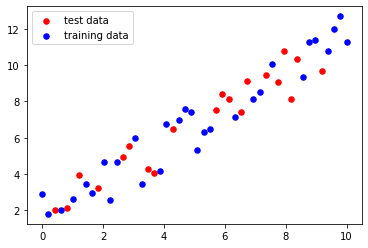

In [19]:
# split the random dataset into training and test sets
from sklearn.model_selection import train_test_split
x_training, x_test, y_training, y_test = train_test_split(x_rand, y_rand, test_size =0.4) # split the initial random set into test and training sets

plt.scatter(x_test, y_test, label='test data', s=30, c='r')
plt.scatter(x_training, y_training, label='training data', s=30, c='b')
plt.legend()
plt.show()

In [20]:
# reshape the sets (required by Ridge below)
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
x_training = x_training.reshape(-1, 1)
y_training = y_training.reshape(-1, 1)

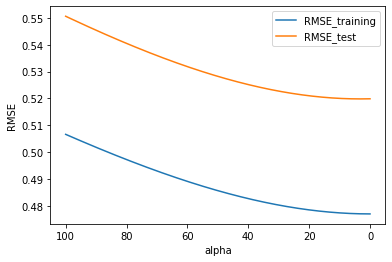

In [21]:
# from math import sqrt
# apply Ridge for a range of parameters and plot
n_alphas = 1000
alphas = np.linspace(0, 100, n_alphas) # range of parameters
std_training = np.zeros((n_alphas, 1)) # array storing training target values deviations
std_test = np.zeros((n_alphas, 1))     # array storing trtestaining target values deviations

j = 0
ridge = Ridge() # sklearn regularization
for a in alphas:    
    ridge.set_params(alpha=a, fit_intercept=False) # regularization without fitting itercept
    # fit linear model
    ridge.fit(x_training, y_training)
  
    # predict target training and test values using the linear model fitted above
    y_ridge_test = ridge.predict(x_test) 
    y_ridge_training = ridge.predict(x_training)

    # compute standard deviations of predicted target vlues from the ones given in the training and test datasets
    std_training[j] = np.sqrt(linalg.norm(y_training - y_ridge_training)/np.shape(x_training)[0])
    std_test[j] = np.sqrt(linalg.norm(y_test - y_ridge_test)/np.shape(x_test)[0])    
    j += 1

# do plotting
ax = plt.gca()
ax.plot(alphas, std_training, label='RMSE_training')
ax.plot(alphas, std_test, label='RMSE_test')
ax.set_xlim(ax.get_xlim()[::-1])
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.legend()
plt.show()


# Multicollinearity

Multiple regresion: predictors $x_1,~x_2$, target variable $y$.

Predictors are almost linearly dependent: $x_2=2x_1+\mbox{noice of order}~10^{-4}$

100 sample data.

2 datasets. 
X and y in both datasets are very close. We could make X exactly the same in both cases as we did before. X is ill-conditioned as before. Boundary case. Full rank, but almost not full rank. 
The standard deviation between the datasets is of order $10^{-4}$.

Results of approximating by a plain:
* least squares,
* least squares with Tikhonov (aka ridge) regularization.

x1_input1 = [[0. ]
 [0.7]
 [0.6]
 [0.9]
 [0.3]
 [0.2]
 [0.8]
 [0. ]
 [0.5]
 [0.8]]
x2_input1 = [[5.0000e-04]
 [1.4002e+00]
 [1.2003e+00]
 [1.8008e+00]
 [6.0000e-01]
 [4.0090e-01]
 [1.6006e+00]
 [8.0000e-04]
 [1.0003e+00]
 [1.6008e+00]]
2*x1-x2 l2 norm:  0.04343726771346487
coefs1:  [[    6.4385622 ]
 [-4050.03058666]
 [ 2022.62953338]]
x1_input2 = [[0.009]
 [0.702]
 [0.605]
 [0.9  ]
 [0.305]
 [0.203]
 [0.804]
 [0.004]
 [0.503]
 [0.806]]
x2_input2 = [[0.0045]
 [1.4062]
 [1.2003]
 [1.8058]
 [0.604 ]
 [0.4079]
 [1.6056]
 [0.0058]
 [1.0033]
 [1.6058]]
standard deviations of the noisy data from the initial input
in x1:  0.03855654127034544
in x2:  0.03877279507383081
in y:  0.03898548980527274
coefs2:  [[   9.23209126]
 [-520.45009619]
 [ 256.93456485]]


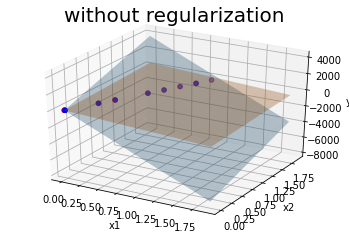

In [22]:
# number of observations
n = 10

# multiple regression
# predictors x1, x2, terget variable y
# x1, x2 are almost linearly dependent: x2 = 2*x1+noise of orde 10**(-4)
x1_input1 = 0.1 * np.random.randint(10, size=(n, 1))
print("x1_input1 =", x1_input1)
x2_input1 = 2* x1_input1 + 0.0001 * np.random.randint(10, size=(n, 1))
print("x2_input1 =", x2_input1)
y_input1 = np.random.randint(10, size=(n, 1))
print('2*x1-x2 l2 norm: ', sqrt(linalg.norm(2*x1_input1-x2_input1)))

X1 = np.hstack((np.ones((n, 1)), x1_input1, x2_input1))
coefs1_lstsq = linalg.lstsq(X1, y_input1)[0]
print('coefs1: ', coefs1_lstsq)

fig, ax1 = plt.subplots(subplot_kw={"projection": "3d"})
X = np.arange(0, 2, 0.1)
Y = np.arange(0, 2, 0.1)
X, Y = np.meshgrid(X, Y)
Z1 = coefs1_lstsq[0] + coefs1_lstsq[1] * X + coefs1_lstsq[2] * Y
ax1.plot_surface(X, Y, Z1, rstride=3, cstride=3, alpha=0.3)

# slightly chage the initial input by a noise of orde 10**(-3)
x1_input2 = x1_input1 + 0.001 * np.random.randint(10, size=(n, 1))
print("x1_input2 =", x1_input2)
x2_input2 = x2_input1 + 0.001 * np.random.randint(10, size=(n, 1))
print("x2_input2 =", x2_input2)
y_input2 = y_input1 + 0.001 * np.random.randint(10, size=(n, 1))
print('standard deviations of the noisy data from the initial input')
print('in x1: ', sqrt(linalg.norm(x1_input1-x1_input2) / n))
print('in x2: ', sqrt(linalg.norm(x2_input1-x2_input2) / n))
print('in y: ', sqrt(linalg.norm(y_input1-y_input2) / n))
X2 = np.hstack((np.ones((n, 1)), x1_input2, x2_input2))
coefs2_lstsq = linalg.lstsq(X2, y_input2)[0]
print('coefs2: ', coefs2_lstsq)
Z2 = coefs2_lstsq[0] + coefs2_lstsq[1] * X + coefs2_lstsq[2] * Y
ax1.plot_surface(X, Y, Z2, rstride=3, cstride=3, alpha=0.3)

# ax1.set_zlim(zmin=-100, zmax=100)
ax1.scatter(x1_input1, x2_input1, y_input1, c='r')
ax1.scatter(x1_input2, x2_input2, y_input2, c='b')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')
ax1.set_title('without regularization', fontsize=20)
plt.show()

Same, but using plotly

In [23]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=Z1, x=X, y=Y, colorscale='Blues', showscale=False, opacity=0.6), 
                      go.Surface(z=Z2, x=X, y=Y, colorscale='Oranges', showscale=False, opacity=0.6),
                      go.Scatter3d(x = x1_input1.flatten(), y = x2_input1.flatten(), z = y_input1.flatten()),
                      go.Scatter3d(x = x1_input2.flatten(), y = x2_input2.flatten(), z = y_input2.flatten())])
fig.show()

As above but with regularization

In [24]:
# ridge regularization
def rreg(A, b, alpha):
  n = np.shape(A)[1]
  AT = A.T
  b_rreg = AT @ b
  A_rreg = AT @ A + alpha * np.identity(n)
  x_rreg = linalg.solve(A_rreg, b_rreg)
  return x_rreg
  # returns solution of the regularized least squares

[[ 7.21950261]
 [-0.87960716]
 [-1.73810665]]
[[ 7.23223816]
 [-1.11260548]
 [-1.61925157]]


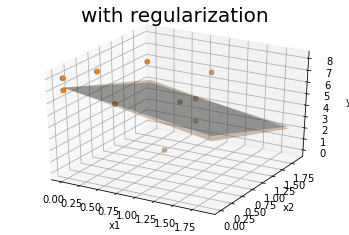

In [25]:
# regularization by hand
alpha = 0.1
coefs1_ridge = rreg(X1, y_input1, alpha)
print(coefs1_ridge)
coefs2_ridge = rreg(X2, y_input2, alpha)
print(coefs2_ridge)

fig, ax2 = plt.subplots(subplot_kw={"projection": "3d"})
# ax2.set_zlim(zmin=0, zmax=10)
Z1 = coefs1_ridge[0] + coefs1_ridge[1] * X + coefs1_ridge[2] * Y
Z2 = coefs2_ridge[0] + coefs2_ridge[1] * X + coefs2_ridge[2] * Y
ax2.plot_surface(X, Y, Z1, rstride=3, cstride=3, alpha=0.3)
ax2.plot_surface(X, Y, Z2, rstride=3, cstride=3, alpha=0.3)
ax2.scatter(x1_input1, x2_input1, y_input1)
ax2.scatter(x1_input2, x2_input2, y_input2)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('y')
ax2.set_title('with regularization', fontsize=20)
plt.show()

Same, but with ridge function instead of by hand

[[ 0.         -0.94502609 -1.87271758]] [7.45239521]
[[ 0.         -1.19911749 -1.74482451]] [7.46760885]


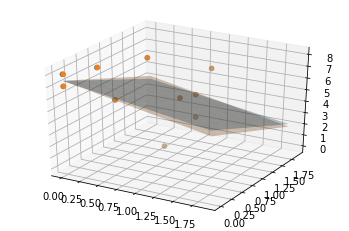

In [26]:
# regularization by sklearn
ridge = Ridge(alpha=0.1)

ridge.fit(X1, y_input1)
k1 = ridge.coef_
b1 = ridge.intercept_
print(k1, b1)

ridge.fit(X2, y_input2)
k2 = ridge.coef_
b2 = ridge.intercept_
print(k2, b2)

fig, ax2 = plt.subplots(subplot_kw={"projection": "3d"})
# ax2.set_zlim(zmin=0, zmax=10)
Z1 = b1[0] + k1[0][1] * X + k1[0][2] * Y
Z2 = b2[0] + k2[0][1] * X + k2[0][2] * Y
ax2.plot_surface(X, Y, Z1, rstride=3, cstride=3, alpha=0.3)
ax2.plot_surface(X, Y, Z2, rstride=3, cstride=3, alpha=0.3)
ax2.scatter(x1_input1, x2_input1, y_input1)
ax2.scatter(x1_input2, x2_input2, y_input2)
plt.show()

In [31]:
ridge = Ridge(alpha=0.1)

X1 = np.hstack((x1_input1, x2_input1))
X2 = np.hstack((x1_input2, x2_input2))
ridge.fit(X1, y_input1)
k1 = ridge.coef_
b1 = ridge.intercept_
print(k1, b1)

ridge.set_params(alpha=10)
ridge.fit(X1, y_input1)
k1 = ridge.coef_
b1 = ridge.intercept_
print(k1, b1)


[[-0.94502609 -1.87271758]] [7.45239521]
[[-0.32230502 -0.64443494]] [5.97369906]
